<a href="https://colab.research.google.com/github/Uday-7046/Breast-Cancer-Prediction/blob/main/Breast_Cancer_Dignosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
from google.colab import files
uploaded = files.upload ()

Saving Breast_cancer_data.csv to Breast_cancer_data.csv


In [4]:
#Importing the dataset
df=pd.read_csv ('/content/Breast_cancer_data.csv')

In [5]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
df.shape

(569, 6)

In [7]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [9]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [10]:
#To drop the column with missing value
# df.drop(['Unnamed: 32'],axis=1)

In [11]:
#Prints unique values in Diagnosis column
df['diagnosis'].unique()

array([0, 1])

In [12]:
#Count of unique values in Diagnosis column
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [13]:
#Convert column names to a list
l=list (df.columns)
print (l)

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']


In [14]:
#summary of all numeric columns
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


## Visualize the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


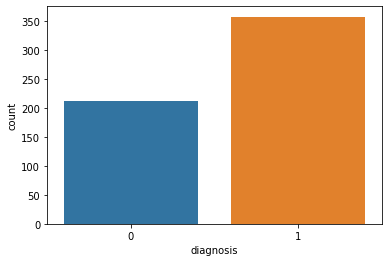

In [15]:
#Showing the total count of malignant and benign patients in a counterplot
sns.countplot(df['diagnosis'])

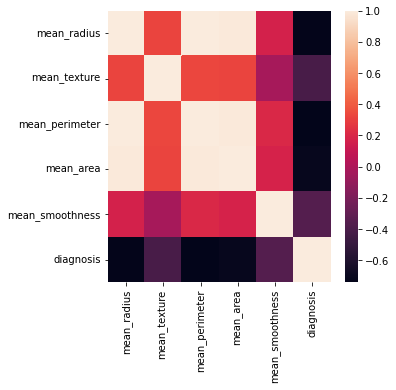

In [18]:
#heat map of Correlation
#corr = df.corr()
plt.figure (figsize= (5,5))
sns.heatmap(df.corr())

## Encode the categorical data

In [19]:
# diagnosis_dict = {'M':1,'B':0}  # M - Malignant and B - Benign

In [20]:
# df ['diagnosis'] = df ['diagnosis'].map(diagnosis_dict)
# df ['diagnosis'].unique()

## Splitting the data

In [21]:
#Splitting the data into the Training and Testing set
x = df.drop('diagnosis',axis=1) # input values
y = df ['diagnosis']   # target value

In [22]:
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.3,random_state=12)

In [25]:
x_train.shape

(398, 5)

In [26]:
x_test.shape

(171, 5)

In [27]:
y_train.shape

(398,)

In [28]:
y_test.shape

(171,)

## Feature Scaling

In [29]:
#Feature Scaling of data
# to put the data in the same scale
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [30]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

Here after feature scaling the data was converted into numpy array so to describe the data we have to convert it into DataFrame.

In [68]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,1.461701e-16,7.855246e-16,-2.410132e-16,-4.937424e-17,-5.761723e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.861279e+00,-2.163213e+00,-1.850018e+00,-1.398001e+00,-3.164821e+00
25%,-7.108468e-01,-7.320116e-01,-7.097696e-01,-6.845197e-01,-7.382909e-01
50%,-2.056184e-01,-1.192735e-01,-2.102413e-01,-2.893928e-01,-2.844025e-02
75%,5.107182e-01,5.705421e-01,4.849989e-01,3.876622e-01,6.575073e-01
max,3.786116e+00,4.395581e+00,3.934148e+00,5.247374e+00,3.504153e+00


In [69]:
pd.DataFrame(x_test).describe()

,0,1,2,3,4
count,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02
mean,-2.606752e-16,-3.885781e-16,3.441042e-17,-1.412126e-16,-1.727014e-16
std,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00
min,-1.953579e+00,-2.281217e+00,-1.903050e+00,-1.409192e+00,-2.201387e+00
25%,-6.966585e-01,-7.017282e-01,-6.768365e-01,-6.747082e-01,-6.628481e-01
50%,-2.245102e-01,-5.545201e-02,-2.450030e-01,-2.945880e-01,-4.503656e-02
75%,4.934905e-01,6.390938e-01,5.606566e-01,3.528616e-01,5.238293e-01
max,3.949392e+00,3.173247e+00,3.926300e+00,5.257771e+00,4.583245e+00


# Model selection
We have the clean data to build our model. But we have to find which Machine learning algorithm is best for the data. The output is a categorical format so we will use supervised classification machine learning algorithms. To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best Machine learning model. We are going to fit our model on 4 different classification algorithms namely Logistic Regression, Decision Tree Classifier, Random forest classifier, and Support Vector Machine. And use the algorithm with the highest accuracy among all for our model.

Logistic Regression

In [31]:
#Importing Logistic Regression from Scikit learn library
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [32]:
#Loading the training data in the model
lr.fit(x_train, y_train)

LogisticRegression()

In [53]:
x_train_pred_lr = lr.predict(x_train)
x_test_pred_lr = lr.predict(x_test)

In [54]:
print("Training Accuracy :",accuracy_score(x_train_pred_lr,y_train))
print("Testing Accuracy :",accuracy_score(x_test_pred_lr,y_test))

Training Accuracy : 0.9422110552763819
Testing Accuracy : 0.9239766081871345


Decision Tree

In [46]:
#Importing from Decision Tree Classifier from Scikit learn library
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [47]:
#Loading the training data in the model
dtc.fit (x_train,y_train)

DecisionTreeClassifier()

In [55]:
x_train_pred_dtc = dtc.predict(x_train)
x_test_pred_dtc = dtc.predict(x_test)

In [56]:
print("Training Accuracy :",accuracy_score(x_train_pred_dtc,y_train))
print("Testing Accuracy :",accuracy_score(x_test_pred_dtc,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8654970760233918


Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [40]:
#Loading the training data in the model
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
x_train_pred_rfc = rfc.predict(x_train)
x_test_pred_rfc = rfc.predict(x_test)

In [58]:
print("Training Accuracy :",accuracy_score(x_train_pred_rfc,y_train))
print("Testing Accuracy :",accuracy_score(x_test_pred_rfc,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8830409356725146


Support Vector Machine

In [34]:
from sklearn.svm import SVC
svc = SVC ()

In [36]:
#Loading the training data in the model
svc.fit(x_train,y_train)

SVC()

In [59]:
x_train_pred_svc = svc.predict(x_train)
x_test_pred_svc = svc.predict(x_test)

In [60]:
print("Training Accuracy :",accuracy_score(x_train_pred_svc,y_train))
print("Testing Accuracy :",accuracy_score(x_test_pred_svc,y_test))

Training Accuracy : 0.949748743718593
Testing Accuracy : 0.9181286549707602


Among these 4 classifiers Logistic Regression has more testing accuracy score. So, we can use Logisic Regression Model for Prediction.

Prediction

In [66]:
input_data = (19.0,8.0,110.0,1500,0.123)
input_array = np.asarray(input_data)

reshaped_array = input_array.reshape(1,-1)

prediction = lr.predict(reshaped_array)
print(prediction)

if prediction==0:
  print("Breast Cancer is Malignant.")
else:
  print("Breast Cancer is Benign.")

[0]
Breast Cancer is Malignant.
